In [ ]:
#### import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

import missingno
import sklearn

import xgboost as xgb
from xgboost import plot_tree

import scikitplot as skplt

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1pYKNCwkfdr42SFO0TQjpbbF2luFAHZLW"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

df = df.sample(frac=0.3, random_state = 117, axis = 0)

In [4]:

X = df.drop(['New_ID','month','day', 'y'], axis = 1)
Y = df['y']

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# End of Data PreProcessing

In [6]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)
X_train.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
6870,1,2,1,1,36,2,0,302,0,0,60,6,-1,0
10716,2,1,1,1,39,3,0,1832,0,0,353,2,-1,0
20491,2,2,1,1,34,2,0,27,0,0,256,9,-1,0
30178,9,3,1,2,38,1,0,890,1,0,43,2,-1,0
44962,6,2,1,2,34,1,0,247,0,0,401,2,-1,0


In [7]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
0,0.706411,1.757765,-0.238486,1.522946,-0.465002,2.154895,-0.134206,-0.061200,0.877344,-0.444739,1.412249,0.055668,-0.424203,-0.309530
1,-0.781261,0.235640,-0.238486,-0.441748,-0.084157,2.154895,-0.134206,-0.465298,-1.139804,-0.444739,-0.774904,-0.241047,-0.424203,-0.309530
2,-0.037425,1.757765,-0.238486,1.522946,1.153591,2.154895,-0.134206,-0.465656,0.877344,-0.444739,-0.472961,0.055668,-0.365922,0.242577
3,0.334493,0.235640,4.193112,1.522946,4.295565,-0.734272,-0.134206,0.073619,-1.139804,-0.444739,-0.368442,0.055668,0.566581,0.242577
4,0.706411,0.235640,-0.238486,-0.441748,-1.131481,0.710311,-0.134206,-0.203190,-1.139804,-0.444739,-0.592964,0.055668,-0.424203,-0.309530


In [8]:
Y_train.value_counts(normalize=True)

0    0.880922
1    0.119078
Name: y, dtype: float64

In [9]:
Y_test.value_counts(normalize=True)

0    0.894582
1    0.105418
Name: y, dtype: float64

In [10]:
%%time
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, Y_train)

CPU times: user 178 ms, sys: 761 µs, total: 179 ms
Wall time: 525 ms


KNeighborsClassifier(n_neighbors=3)

In [11]:
%%time
clf.predict(X_test)

CPU times: user 514 ms, sys: 0 ns, total: 514 ms
Wall time: 1.2 s


array([0, 0, 0, ..., 0, 0, 0])

In [12]:
%%time
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9647437236697963
Test AUC Score 0.7486608982282652
 
Acuracy  0.8857353483228898
ROC_AUC  0.7486608982282652
PR  0.2937231206101878
 
[[2296  131]
 [ 179  107]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2427
           1       0.45      0.37      0.41       286

    accuracy                           0.89      2713
   macro avg       0.69      0.66      0.67      2713
weighted avg       0.88      0.89      0.88      2713

CPU times: user 2.74 s, sys: 0 ns, total: 2.74 s
Wall time: 6.27 s


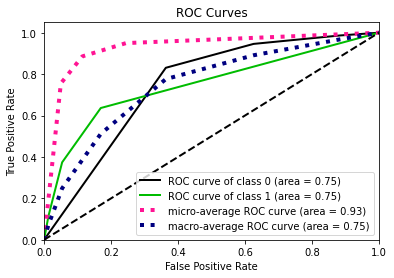

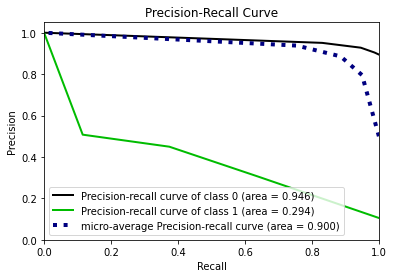

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

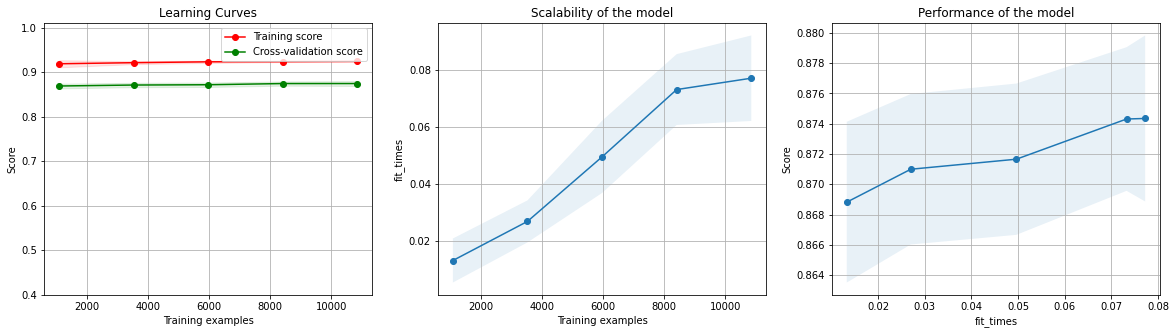

In [13]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [14]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [15]:
%%time
parameters = [{    
    # 'leaf_size'        : list(range(5,15)),
     'n_neighbors' : list(range(3, 25))
    # 'p'            : [1,2]
}]

eval_set = [(X_train, Y_train)]

GridSearch = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, n_jobs=-1, cv=5, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train)


CPU times: user 594 ms, sys: 19.3 ms, total: 613 ms
Wall time: 42.5 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24]}],
             scoring='roc_auc')

Understanding Bias & Variance: https://www.coursera.org/lecture/machine-learning/learning-curves-Kont7
https://elitedatascience.com/bias-variance-tradeoff

In [16]:
GridSearch.best_params_

{'n_neighbors': 24}

In [17]:
%%time
clf = KNeighborsClassifier(
    n_neighbors = 24

)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)
#clf.fit(X_train, Y_train, early_stopping_rounds=10)

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 460 ms


KNeighborsClassifier(n_neighbors=24)

In [18]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.41 s, sys: 0 ns, total: 1.41 s
Wall time: 3.06 s


In [19]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9172229089210601
Test AUC Score 0.8614998516111001
 
Acuracy  0.900847769996314
ROC_AUC  0.8614998516111001
PR  0.4175864218812837
 
[[2381   46]
 [ 223   63]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2427
           1       0.58      0.22      0.32       286

    accuracy                           0.90      2713
   macro avg       0.75      0.60      0.63      2713
weighted avg       0.88      0.90      0.88      2713



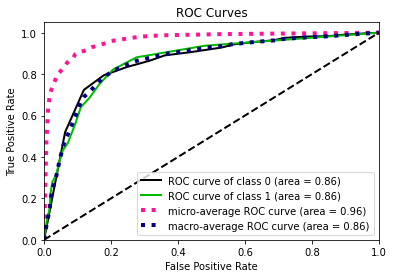

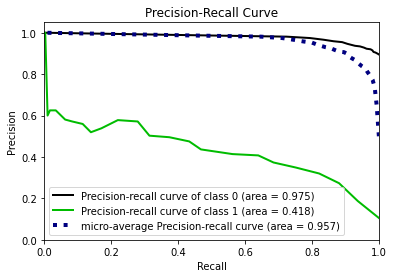

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

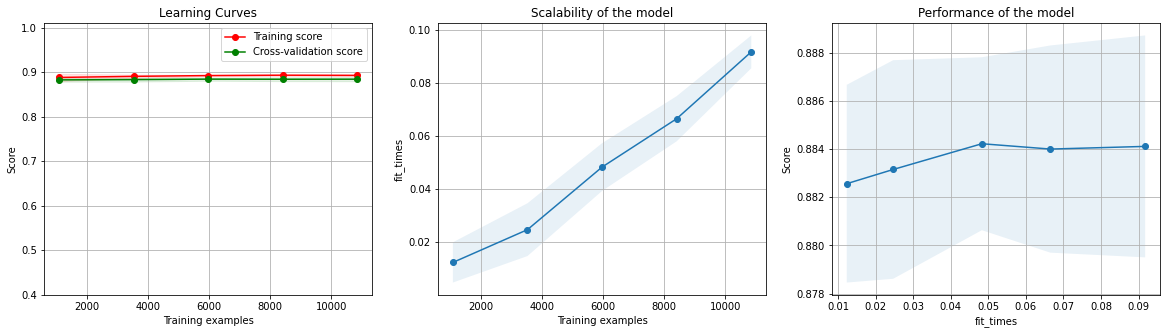

In [20]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [21]:
%%time
parameters = [{    
    # 'leaf_size'        : list(range(5,15)),
     'n_neighbors' : [24]
     ,'p'            : [1,2]
}]

eval_set = [(X_train, Y_train)]

GridSearch = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, n_jobs=-1, cv=5, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train)


CPU times: user 217 ms, sys: 382 µs, total: 217 ms
Wall time: 5.99 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [24], 'p': [1, 2]}],
             scoring='roc_auc')

In [22]:
GridSearch.best_params_

{'n_neighbors': 24, 'p': 1}

In [23]:
%%time
clf = KNeighborsClassifier(
    n_neighbors = 24,
    p = 1
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)

CPU times: user 173 ms, sys: 0 ns, total: 173 ms
Wall time: 465 ms


KNeighborsClassifier(n_neighbors=24, p=1)

In [24]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.88 s, sys: 0 ns, total: 1.88 s
Wall time: 4.2 s


In [25]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9214002728656138
Test AUC Score 0.8650633462129136
 
Acuracy  0.8967932178400295
ROC_AUC  0.8650633462129136
PR  0.4076910945614768
 
[[2379   48]
 [ 232   54]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2427
           1       0.53      0.19      0.28       286

    accuracy                           0.90      2713
   macro avg       0.72      0.58      0.61      2713
weighted avg       0.87      0.90      0.87      2713



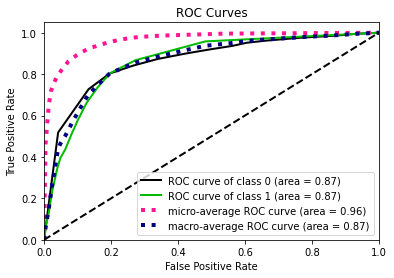

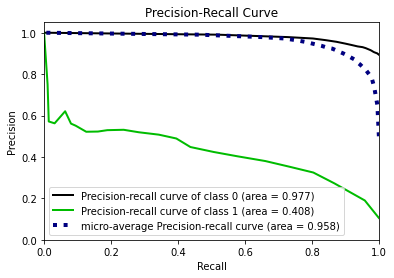

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

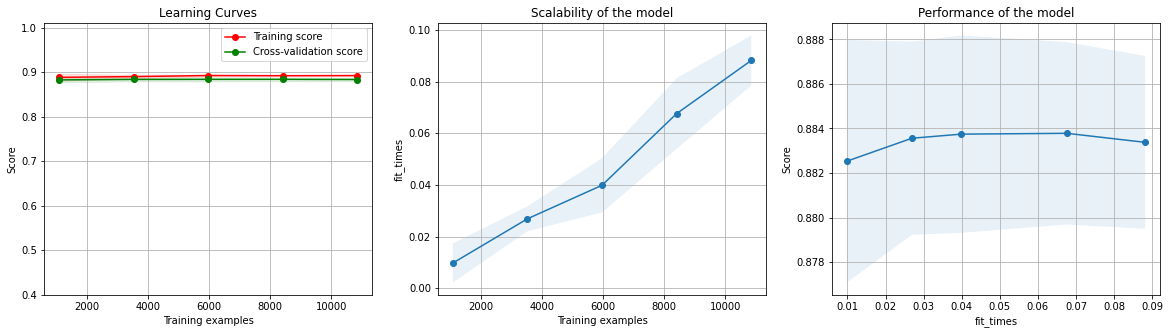

In [26]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.plot()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [27]:
%%time
clf = KNeighborsClassifier(
    n_neighbors = 10,
    p = 1
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)

CPU times: user 173 ms, sys: 151 µs, total: 173 ms
Wall time: 442 ms


KNeighborsClassifier(n_neighbors=10, p=1)

In [28]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.53 s, sys: 3.55 ms, total: 1.53 s
Wall time: 3.44 s


In [29]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9366212198362677
Test AUC Score 0.8367758117449093
 
Acuracy  0.901953556948028
ROC_AUC  0.8367758117449093
PR  0.39527636413230244
 
[[2378   49]
 [ 217   69]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2427
           1       0.58      0.24      0.34       286

    accuracy                           0.90      2713
   macro avg       0.75      0.61      0.64      2713
weighted avg       0.88      0.90      0.88      2713



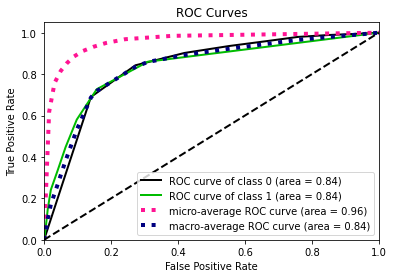

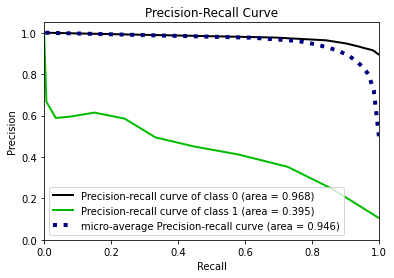

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

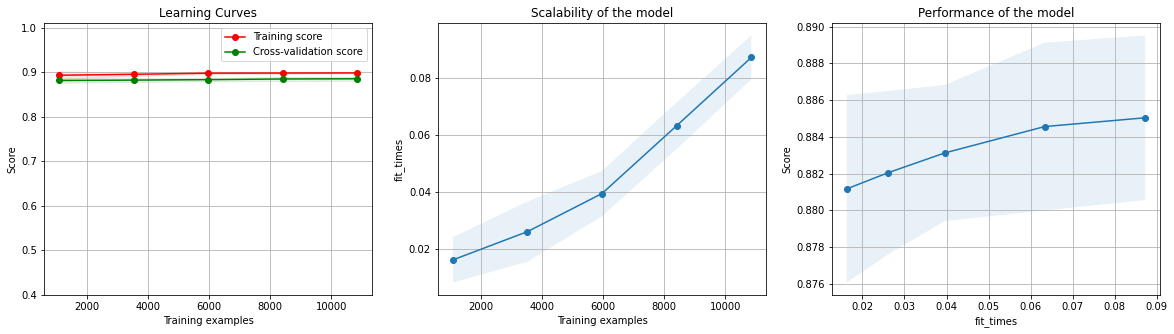

In [30]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.plot()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [41]:
%%time
clf = KNeighborsClassifier(
    n_neighbors = 24,
    p = 2
    ,weights = 'uniform' # distance overfits
    ,algorithm = 'auto' #Other algorythms did not improve the overfit 
    ,leaf_size = 15
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)

CPU times: user 183 ms, sys: 0 ns, total: 183 ms
Wall time: 447 ms


KNeighborsClassifier(leaf_size=15, n_neighbors=24)

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score
cross_val_score(clf, X, Y, cv=10, scoring='roc_auc')

array([0.83750699, 0.84881388, 0.81727917, 0.7649979 , 0.7822336 ,
       0.81753608, 0.83398227, 0.80210689, 0.82520974, 0.79638268])

In [43]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9172229089210601
Test AUC Score 0.8614998516111001
 
Acuracy  0.900847769996314
ROC_AUC  0.8614998516111001
PR  0.4175864218812837
 
[[2381   46]
 [ 223   63]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2427
           1       0.58      0.22      0.32       286

    accuracy                           0.90      2713
   macro avg       0.75      0.60      0.63      2713
weighted avg       0.88      0.90      0.88      2713



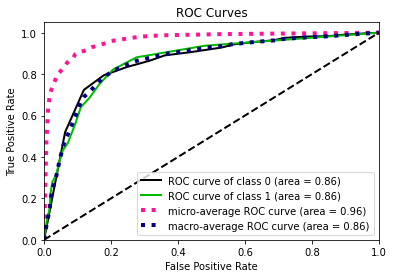

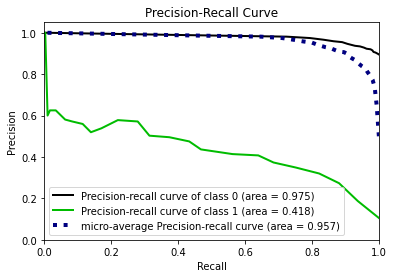

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

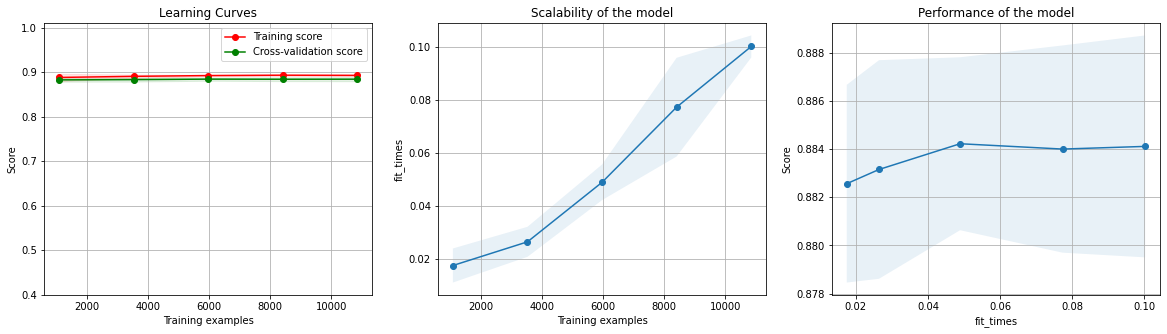

In [44]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.plot()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

Minimum error:- 0.09841503870254331 at K = 22


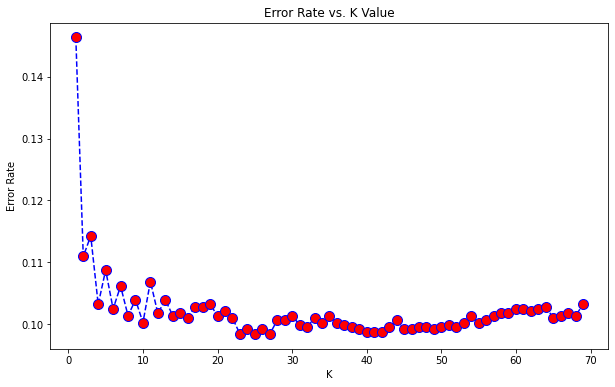

In [45]:
error_rate = []
for i in range(1,70):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9015849612974567 at K = 22


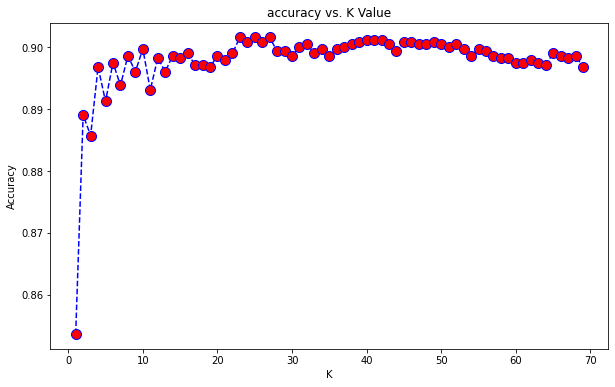

In [46]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,70):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,70),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))